In [1]:
# Import data manipulation and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Machine Learning imports
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
# Reading dataset
df = pd.read_csv("Employee_attrition.csv")

In [4]:
df.head() # Displays first 5 rows by default

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.shape 
# Rows = 1470
# Columns = 35

(1470, 35)

In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


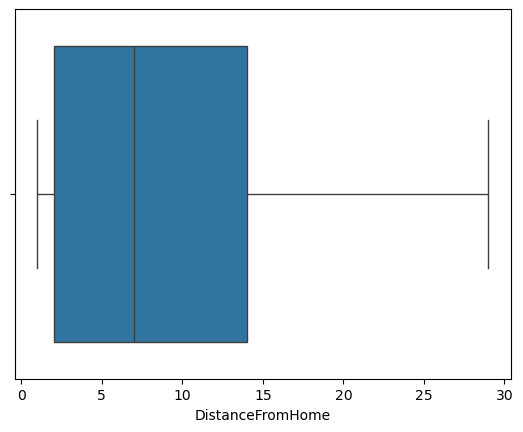

In [8]:
sns.boxplot(data =df,x = 'DistanceFromHome')
plt.show()

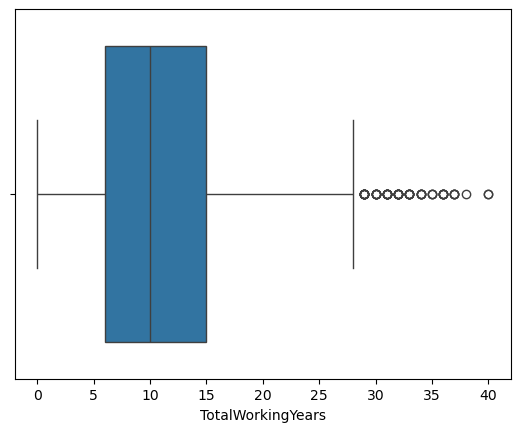

In [9]:
sns.boxplot(data =df,x = 'TotalWorkingYears')
plt.show()

In [10]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [11]:
df["Education"].head()

0    2
1    1
2    2
3    4
4    1
Name: Education, dtype: int64

In [12]:
# Chnaging datatype of "Education" from int --> str/object
df["Education"] = df["Education"].astype('str')

In [13]:
df.dtypes # Education's datatype has been changed

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                   object
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [14]:
# Checking null values in dataset
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [15]:
# Dropping Unnecessary columns
df.drop(["EmployeeCount","EmployeeNumber","Over18"], axis = 1, inplace = True)

In [16]:
df.shape          # 3 columns --> dropped

(1470, 32)

In [17]:
# Categorical data only
cat_col = []
for i in df.columns:
    if df[i].dtypes == object:
        cat_col.append(i)

In [18]:
cat_col     # Need to encode it using LabelEncoder

['Attrition',
 'BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [19]:
# Before label encoding -- Department Example
df["Department"].value_counts() # Categorical values

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

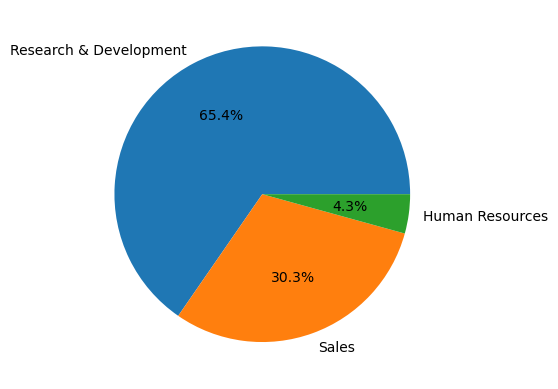

In [20]:
# Visual representation --> pie chart
plt.pie(df["Department"].value_counts(), labels = df["Department"].value_counts().index,autopct = "%1.1f%%")
plt.show()

In [21]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for i in cat_col:
    df[i] = label.fit_transform(df[i])

In [22]:
# After labelEncoding
df["Department"].value_counts()

Department
1    961
2    446
0     63
Name: count, dtype: int64

In [23]:
df.head() # All Catgorical columns converted to --> Labels

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,1,1,2,0,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,0,1,3,1,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,1,4,4,1,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,3,1,4,0,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,0,3,1,1,...,4,80,1,6,3,3,2,2,2,2


In [24]:
# For Attrition --> Assigned yes = 1, No = 0

In [25]:
X = df.drop(["Attrition"], axis = 1)
y = df["Attrition"]

In [26]:
X.head(3)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,1,1,2,0,94,...,1,80,0,8,0,1,6,4,0,5
1,49,1,279,1,8,0,1,3,1,61,...,4,80,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,1,4,4,1,92,...,2,80,0,7,3,3,0,0,0,0


In [27]:
y.head(3) # All columns except Attrition

0    1
1    0
2    1
Name: Attrition, dtype: int64

In [28]:
X.shape

(1470, 31)

In [29]:
y.shape # Only 1 column - Attrition

(1470,)

In [30]:
y.value_counts() # Biased data --> yes = 1, No = 0 --> Inaccurate model

Attrition
0    1233
1     237
Name: count, dtype: int64

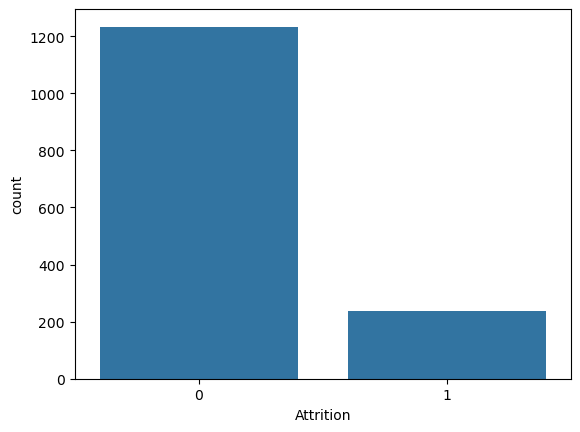

In [31]:
# Visalization -> Bar chart
sns.countplot(x='Attrition', data=df)
plt.show()

In [32]:
# Try balancing the data --> upsampling, downsampling or SMOTE(Synthetic Minority Oversampling Technique)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 42,
    stratify = y # proportions in y reamins same in train and test
)

In [33]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [34]:
y_train_smote.value_counts() 

Attrition
0    986
1    986
Name: count, dtype: int64

In [35]:
# Converting the array to DataFrame
X_train_smote = pd.DataFrame(
    X_train_smote,
    columns = X_train.columns
)

In [36]:
X_train.shape

(1176, 31)

In [37]:
y_train.shape

(1176,)

In [38]:
X_test.shape

(294, 31)

In [39]:
y_test.shape

(294,)

In [40]:
from sklearn.preprocessing import StandardScaler
# Improving Model Performance
# Standardizing features -> Mean = 0 and std = 1

scaler = StandardScaler()

X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

In [41]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 3000, solver = "lbfgs")

# solver --> used for scaled data --> optimizes model performance
# max_iter --> prevents convergence warnings

model.fit(X_train_smote_scaled,y_train_smote)

LogisticRegression(max_iter=3000)

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test_scaled)
# Predicts the values 

In [43]:
print(confusion_matrix(y_test, y_pred))

[[211  36]
 [ 23  24]]


In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88       247
           1       0.40      0.51      0.45        47

    accuracy                           0.80       294
   macro avg       0.65      0.68      0.66       294
weighted avg       0.82      0.80      0.81       294



In [45]:
y_test

1061    0
891     0
456     0
922     0
69      1
       ..
1269    0
1352    0
1236    1
1023    0
285     0
Name: Attrition, Length: 294, dtype: int64

In [46]:
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0])

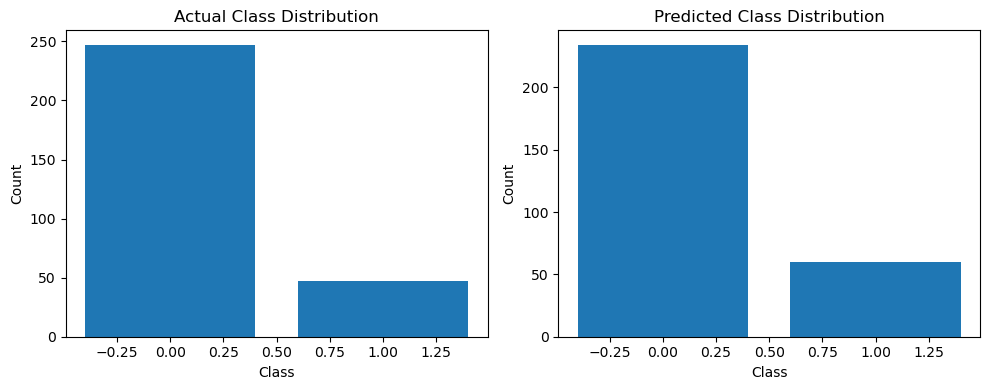

In [55]:
# Comparing y_ored to y_test
# Convert y_pred to Series
y_pred_series = pd.Series(y_pred)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot actual values
axes[0].bar(y_test.value_counts().index, y_test.value_counts().values)
axes[0].set_title("Actual Class Distribution")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Count")

# Plot predicted values
axes[1].bar(y_pred_series.value_counts().index,
            y_pred_series.value_counts().values)
axes[1].set_title("Predicted Class Distribution")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()
